In [142]:
#logistic regression(algerian)


In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from warnings import filterwarnings
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
filterwarnings('ignore')
%matplotlib inline

In [11]:
df=pd.read_csv(r"data\\Algerian_forest_fires_dataset_UPDATE.csv",encoding="utf-8")

In [330]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [332]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
242,27,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,9.0,2012.0,24.0,64.0,15.0,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [334]:
df.shape

(246, 14)

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          245 non-null    object 
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    float64
 4    RH          244 non-null    float64
 5    Ws          244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(10), object(4)
memory usage: 27.0+ KB


In [338]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [340]:
df.describe()

,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
count,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754
std,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824
min,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000
25%,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000
50%,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000
75%,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000
max,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000


In [342]:
df.iloc[121:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,9.0,2012.0,25.0,78.0,14.0,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,1,6.0,2012.0,32.0,71.0,12.0,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [344]:
df.drop([122,123],inplace=True)

In [346]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [348]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [350]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [352]:
df.dropna(inplace=True)

In [354]:
df.dtypes

day             object
month          float64
year           float64
Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes         object
Region         float64
dtype: object

In [356]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Region']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Region']].apply(pd.to_numeric, errors='coerce')

In [358]:
df.dtypes

day              int64
month          float64
year           float64
Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes         object
Region         float64
dtype: object

In [360]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [362]:
df.Classes=df.Classes.str.strip()
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [364]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [378]:
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].apply(pd.to_numeric, errors='coerce')

In [380]:
df.dtypes

day              int64
month          float64
year           float64
Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region         float64
dtype: object

In [382]:
df1=df.drop(['year'],axis=1)

In [384]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0


In [386]:
set(df1.Classes)

{'fire', 'not fire'}

In [388]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Classes'. 
df1 ['Classes']= label_encoder.fit_transform(df1 ['Classes']) 
df1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0.0
1,2,6.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0.0
2,3,6.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0.0
3,4,6.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0.0
4,5,6.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0.0


In [390]:
set(df1.Classes)

{0, 1}

In [392]:
df1.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,-0.202840,0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,-0.024004,0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.516015,0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.432161,-0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.069964,-0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.379097,-0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.769492,0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.585658,0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.511123,-0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,-0.735197,0.263197


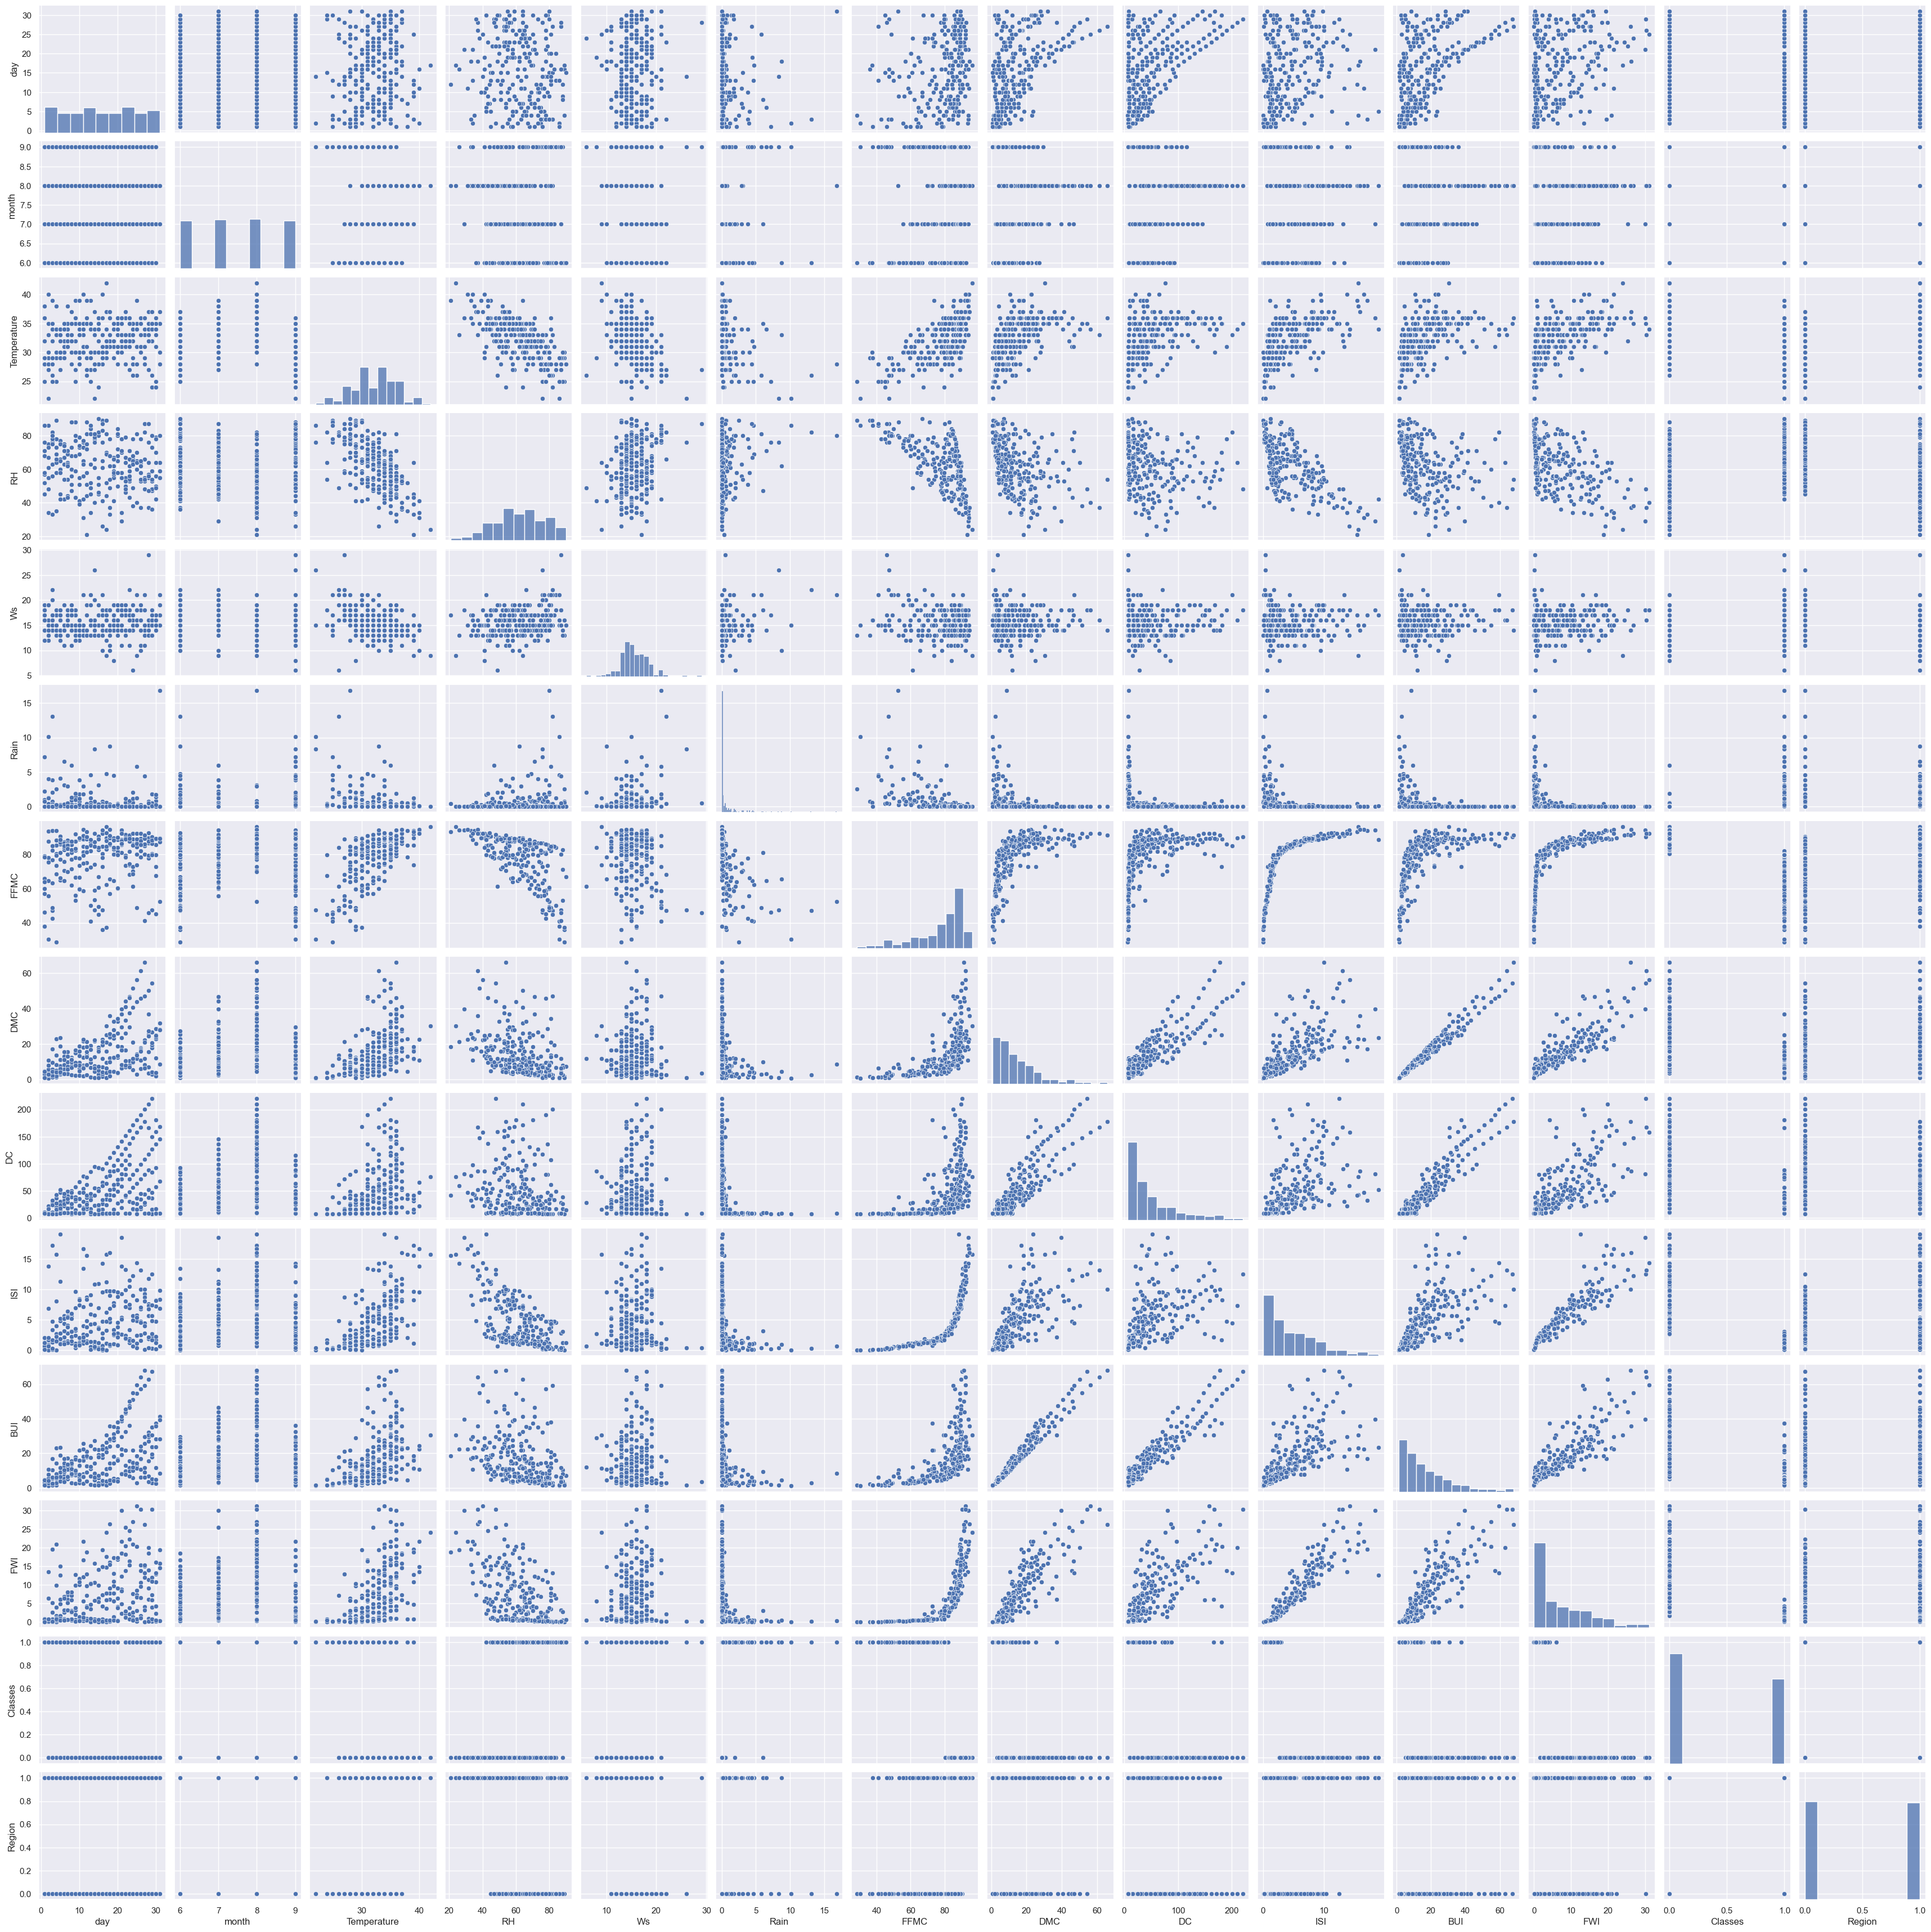

In [394]:
sns.pairplot(df1)

<Axes: >

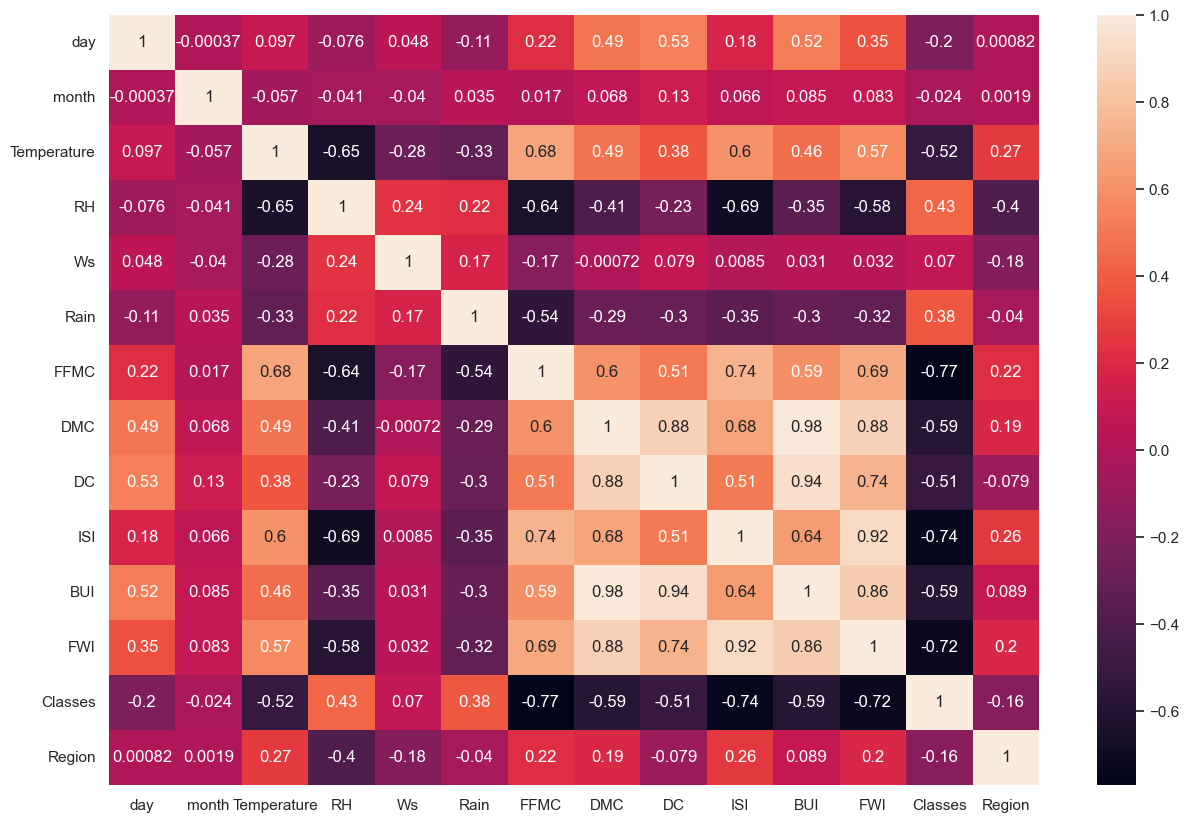

In [395]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df1.corr(),annot=True)

array([[<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'Ws'}>, <Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>, <Axes: title={'center': 'FWI'}>],
       [<Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>, <Axes: >, <Axes: >]],
      dtype=object)

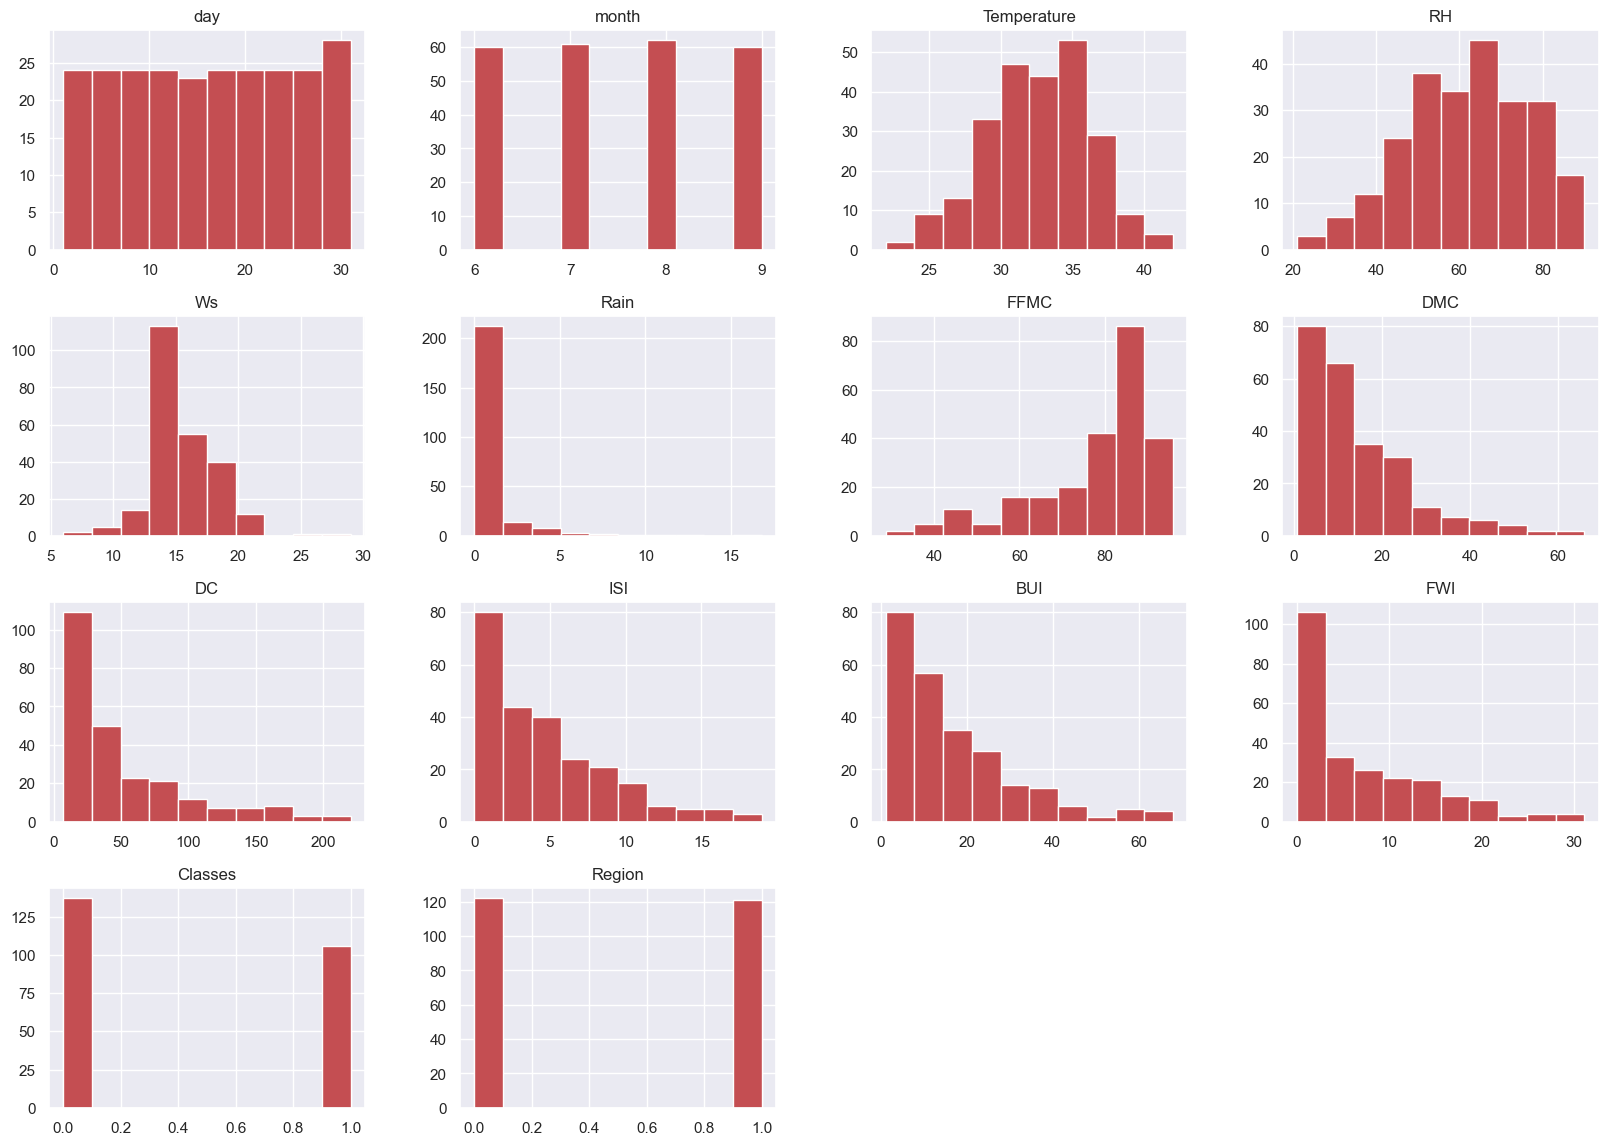

In [396]:
df1.hist(figsize=(20,14),color='r')

In [397]:
percentage=df.Classes.value_counts(normalize=True)*100
percentage

Classes
fire        56.378601
not fire    43.621399
Name: proportion, dtype: float64

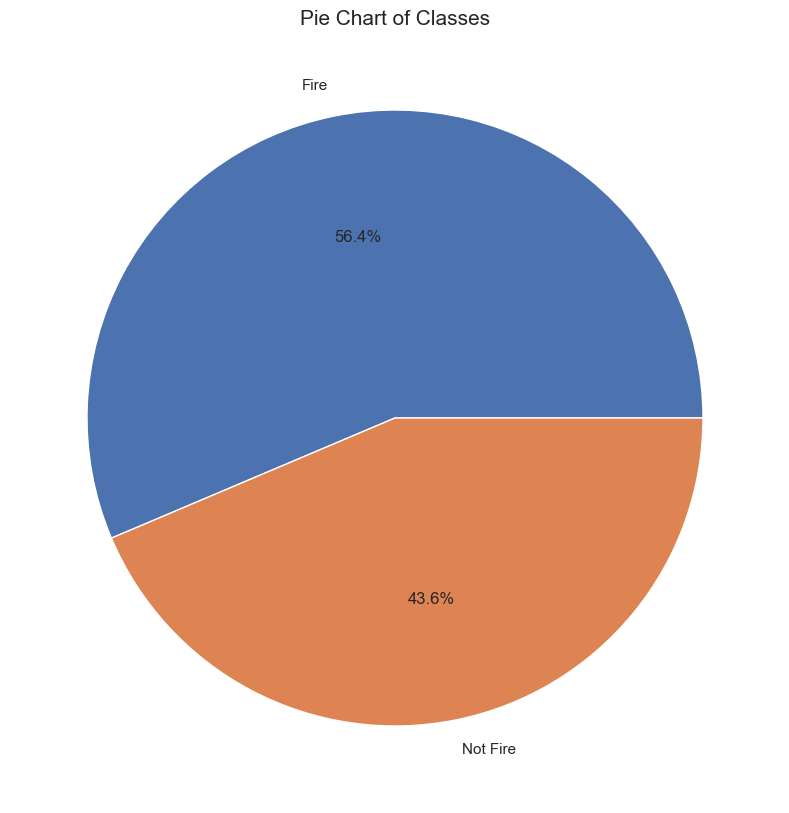

In [402]:
classes_labels=['Fire','Not Fire']
plt.figure(figsize=(15,10))
plt.pie(percentage,labels=classes_labels,autopct="%1.1f%%")
plt.title("Pie Chart of Classes",fontsize=15)
plt.show()

In [406]:
df1

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0.0
1,2,6.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0.0
2,3,6.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0.0
3,4,6.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0.0
4,5,6.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1.0
242,27,9.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1.0
243,28,9.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1.0
244,29,9.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1.0


In [408]:
X = df1[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI','Region']]
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
241,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
242,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1.0
243,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1.0
244,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1.0


In [410]:
y=df1['Classes']
y

0      1
1      1
2      1
3      1
4      1
      ..
241    0
242    1
243    1
244    1
245    1
Name: Classes, Length: 243, dtype: int32

In [412]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=32,test_size=.33)

In [414]:
def Feature_Scaling(X_train, X_test):
    scaler = StandardScaler()
    X_train_after_Standardisation = scaler.fit_transform(X_train)
    X_test_after_Standardisation = scaler.transform(X_test)
    return X_train_after_Standardisation, X_test_after_Standardisation

In [416]:
X_train_after_Standardisation,X_test_after_Standardisation=Feature_Scaling(X_train, X_test)

In [418]:
logistic_regression=LogisticRegression()

In [420]:
logistic_regression.fit(X_train_after_Standardisation,y_train)

LogisticRegression()

In [422]:
print('Intercept is :',logistic_regression.intercept_)
print('Coefficient is :',logistic_regression.coef_)

Intercept is : [-1.69034846]
Coefficient is : [[-0.19344748  0.02477794  0.02649216 -0.21487522 -2.34732983  0.27829329
   0.10776224 -2.31866234 -0.26825004 -1.80274485 -0.09880983]]


In [424]:
print("Training Score:",logistic_regression.score(X_train_after_Standardisation, y_train))
print("Test Score:",logistic_regression.score(X_test_after_Standardisation,y_test))

Training Score: 0.9814814814814815
Test Score: 0.9629629629629629


In [426]:
Logistic_Regression_Prediction=logistic_regression.predict(X_test_after_Standardisation)

In [428]:
accuracy_score(y_test,Logistic_Regression_Prediction)

0.9629629629629629

In [430]:
Actual_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': Logistic_Regression_Prediction})    
Actual_predicted['Report']=abs(Actual_predicted['Actual']-Actual_predicted['Predicted'])
Actual_predicted['Classes']= np.where(Actual_predicted['Report']== 0,'Matched','Unmatched')
Actual_predicted_group_df=Actual_predicted.groupby(['Classes']).agg({'Classes':['count']})
Actual_predicted_group_df.reset_index()

Classes      
             count
0    Matched    78
1  Unmatched     3

In [432]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,Logistic_Regression_Prediction)
conf_mat

array([[41,  2],
       [ 1, 37]], dtype=int64)

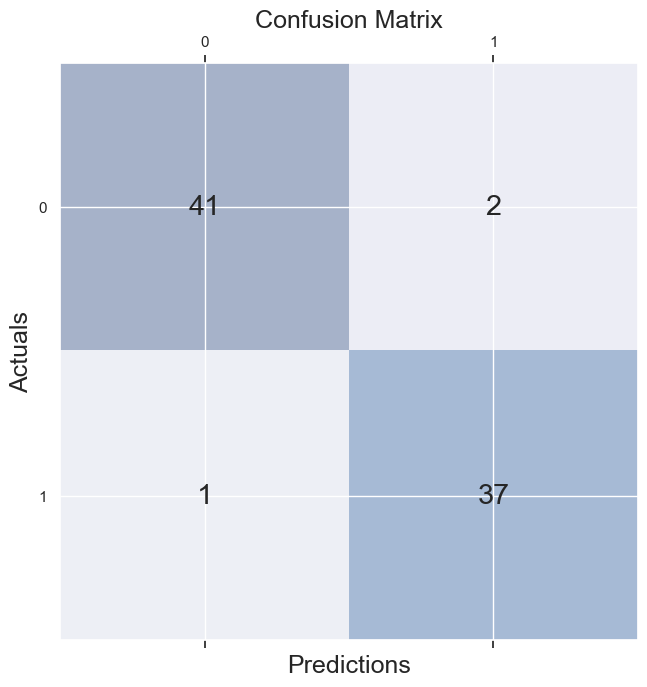

In [434]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=Logistic_Regression_Prediction)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [436]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [438]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9629629629629629

In [440]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9534883720930233

In [442]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9761904761904762

In [444]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9647058823529412

In [446]:
auc = roc_auc_score(y_test, Logistic_Regression_Prediction)
auc

0.9635862913096697

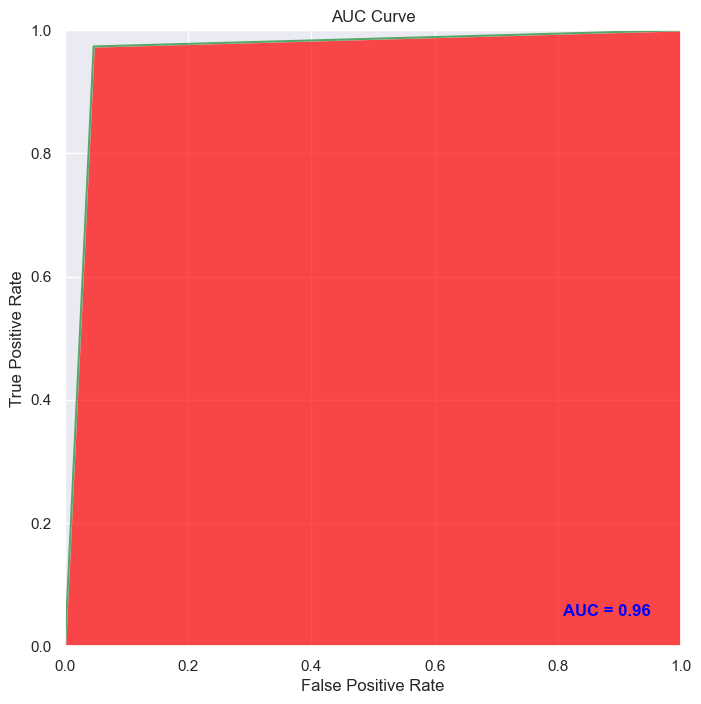

In [448]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, Logistic_Regression_Prediction)
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='red', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [450]:
fpr, tpr, thresholds = roc_curve(y_test, Logistic_Regression_Prediction)

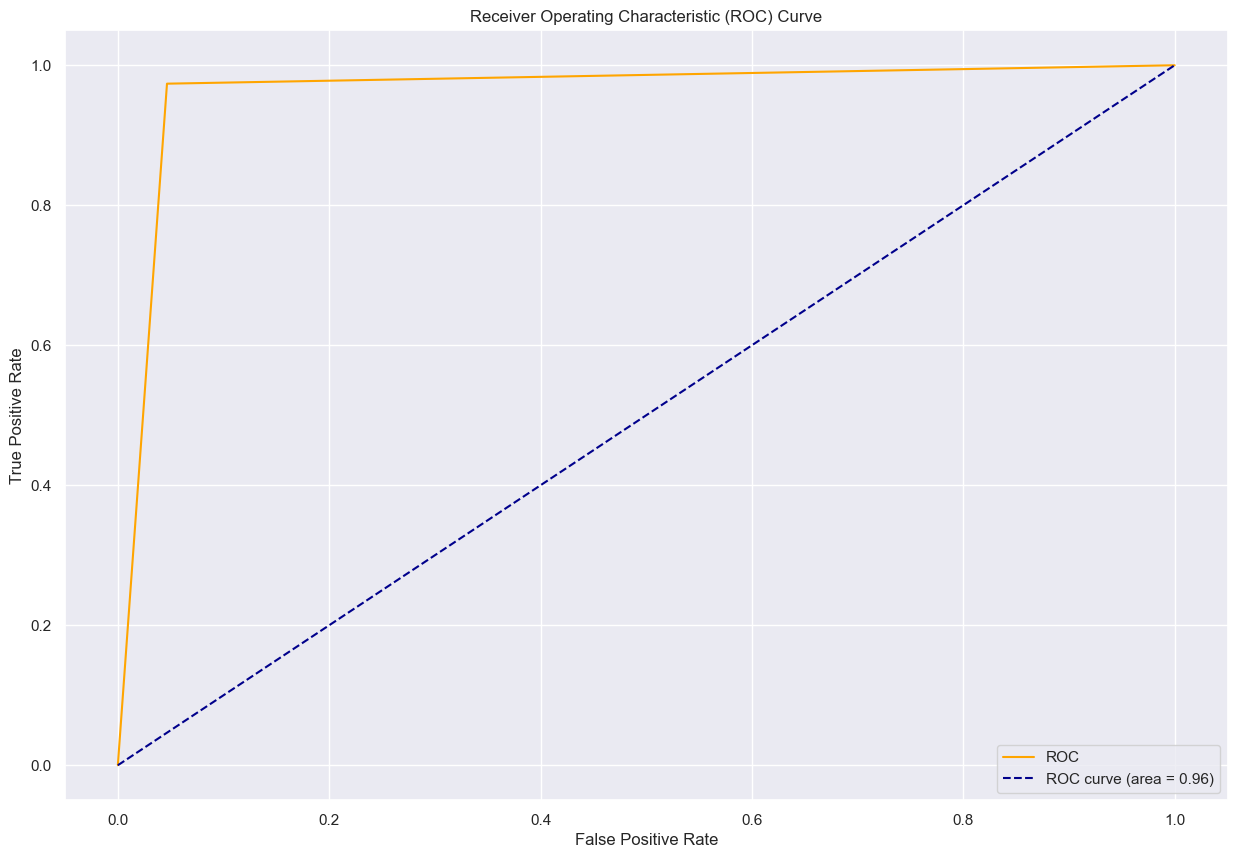

In [452]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()